In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score as ac

# using the genshin banner revenue dataset obtained by my group
dt = pd.read_excel("GenshinBannerRev.xlsx")
dt.dropna(inplace=True)

In [73]:
# adding another column for classification label.
dt["Revenue_Class"] = np.where(dt["Revenue"]>dt["Revenue"].mean(), "Above Average", "Below Average")
dt.info()
dt

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Version            36 non-null     float64
 1   Version Name       36 non-null     object 
 2   Start Date         36 non-null     object 
 3   End Date           36 non-null     object 
 4   5 Star Characters  36 non-null     object 
 5   Rerun              36 non-null     float64
 6   Mixed              36 non-null     object 
 7   Revenue            36 non-null     float64
 8   Banner Days        36 non-null     float64
 9   Avg Revenue/Day    36 non-null     float64
 10  Revenue_Class      36 non-null     object 
dtypes: float64(5), object(6)
memory usage: 3.4+ KB


,Version,Version Name,Start Date,End Date,5 Star Characters,Rerun,Mixed,Revenue,Banner Days,Avg Revenue/Day,Revenue_Class
0,1.0,Welcome to Tevyat,25/09/2020,19/10/2020,Venti,0.0,0.0,30632752.0,25.0,1.225310e+06,Above average
1,1.0,Welcome to Tevyat,20/10/2020,2020-10-11 00:00:00,Klee,0.0,0.0,22750080.0,22.0,1.034095e+06,Above average
2,1.1,A New Star Approaches,2020-11-11 00:00:00,30/11/2020,Tartaglia,0.0,0.0,13443619.0,20.0,6.721809e+05,Below Average
3,1.1,A New Star Approaches,2020-01-12 00:00:00,22/12/2020,Zhongli,0.0,0.0,16264892.0,22.0,7.393133e+05,Below Average
4,1.2,The Chalk Prince and the Dragon,23/12/2020,2021-12-01 00:00:00,Albedo,0.0,0.0,11816107.0,21.0,5.626718e+05,Below Average
5,1.2,The Chalk Prince and the Dragon,13/01/2021,2021-02-02 00:00:00,Ganyu,0.0,0.0,15669918.0,21.0,7.461866e+05,Below Average
6,1.3,All That Glitters,2021-03-02 00:00:00,17/02/2021,Xiao,0.0,0.0,13145115.0,15.0,8.763410e+05,Below Average
7,1.3,All That Glitters,18/02/2021,2021-02-03 00:00:00,Keqing,0.0,0.0,9505798.0,13.0,7.312152e+05,Below Average
8,1.3,All That Glitters,2021-03-03 00:00:00,16/03/2021,Hu Tao,0.0,0.0,12481634.0,14.0,8.915453e+05,Below Average
9,1.4,Invitation to Windblume,17/03/2021,2021-06-04 00:00:00,Venti (Rerun),1.0,0.0,16614209.0,21.0,7.911528e+05,Below Average


In [144]:
x=dt.iloc[:,[0,5,6,8]]
y=dt.loc[:,'Revenue_Class']

#gives 100% accuracy score with this kernel rbf setting (gamma 2.0 and C 20.9)
svm = SVC(kernel= "rbf", random_state=1, gamma=5, C=0.1)

svm.fit(x, y)
y_predict=svm.predict(x)

print(ac(y, y_predict))

0.6944444444444444


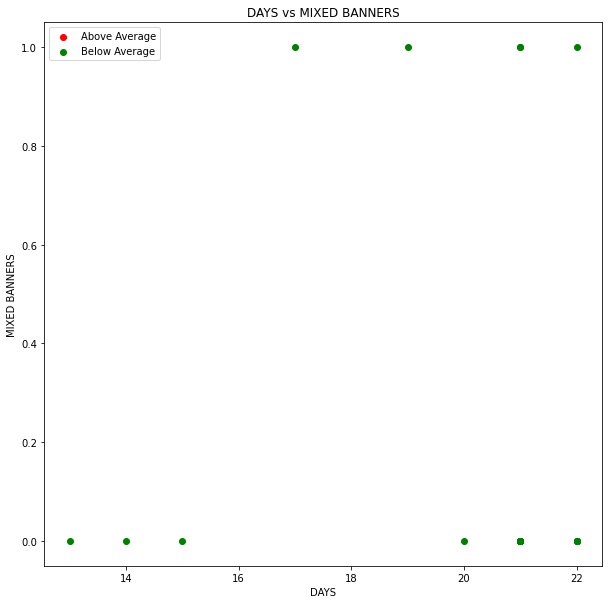

In [130]:
# Plotting mixed banners vs length of each banner
# if it's a mixed banner = 1, if not = 0
fig, plot = plt.subplots(figsize=(10,10))

x = dt[["Banner Days", "Revenue_Class"]]
y = dt[["Mixed", "Revenue_Class"]]
z = dt["Revenue_Class"]

plot.scatter(x[x["Revenue_Class"]== "Above Average"]["Banner Days"], y[y["Revenue_Class"]== "Above Average"]["Mixed"], color = "red", label = "Above Average")
plot.scatter(x[x["Revenue_Class"]== "Below Average"]["Banner Days"], y[y["Revenue_Class"]== "Below Average"]["Mixed"], color = "green", label = "Below Average")
plot.legend()

pd.DataFrame.dropna

plot.set_xlabel("DAYS")
plot.set_ylabel("MIXED BANNERS")
plot.set_title("DAYS vs MIXED BANNERS")

plt.show()

In [123]:
data.to_csv("GenshinRevSVM.csv", index = False)

Conclusion:
After testing out both RBF and Linear Kernels while changing different gamma and C values to the record accuracy scores, I believe that focusing on increasing the C values would end up leading to more accurate results compared to changing the gamma values. C = 1 and gamma = 7 would lead to a 94.44% accuracy score with the RBF kernel meanwhile using the linear kernel would lead to a lower accuracy score of 80.55%. Although using 2.0 Gamma and 20.9 would lead to a 100% accuracy score, it may not be reliable to predict future data. So far, I think our data set would suit using RBF kernel more while focusing on C. 